In [538]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# import japanize_matplotlib
import japanize_matplotlib
import numpy as np
import datetime
# sns.set()

In [539]:
patients_yoko = pd.read_csv('141003_yokohama_covid19_patients.csv')

# 1.前処理

In [540]:
patients_yoko.head()

,No,全国地方自治体コード,都道府県名,市区町村名,公表日,患者_年代,患者_状態,患者_退院済フラグ
0,1,141003,神奈川県,横浜市,2020-02-18,60代,退院,1.0
1,2,141003,神奈川県,横浜市,2020-02-20,60代,退院,1.0
2,3,141003,神奈川県,横浜市,2020-02-21,30代,退院,1.0
3,4,141003,神奈川県,横浜市,2020-02-28,50代,退院,1.0
4,5,141003,神奈川県,横浜市,2020-03-03,20代,退院,1.0


In [541]:
df = patients_yoko.copy()
df

,No,全国地方自治体コード,都道府県名,市区町村名,公表日,患者_年代,患者_状態,患者_退院済フラグ
0,1,141003,神奈川県,横浜市,2020-02-18,60代,退院,1.0
1,2,141003,神奈川県,横浜市,2020-02-20,60代,退院,1.0
2,3,141003,神奈川県,横浜市,2020-02-21,30代,退院,1.0
3,4,141003,神奈川県,横浜市,2020-02-28,50代,退院,1.0
4,5,141003,神奈川県,横浜市,2020-03-03,20代,退院,1.0
...,...,...,...,...,...,...,...,...
13320,13349,141003,神奈川県,横浜市,2021-01-13,20代,軽症,NaN
13321,13350,141003,神奈川県,横浜市,2021-01-13,40代,退院,1.0
13322,13351,141003,神奈川県,横浜市,2021-01-13,20代,調査中,NaN
13323,13352,141003,神奈川県,横浜市,2021-01-13,20代,軽症,NaN


In [542]:
df = df.drop(['No', '全国地方自治体コード', '都道府県名', '市区町村名'], axis=1)
df.rename(columns={'公表日':'datetime', '患者_年代':'age', '患者_状態':'status', '患者_退院済フラグ':'flg_discharge'}, inplace=True)
df

,datetime,age,status,flg_discharge
0,2020-02-18,60代,退院,1.0
1,2020-02-20,60代,退院,1.0
2,2020-02-21,30代,退院,1.0
3,2020-02-28,50代,退院,1.0
4,2020-03-03,20代,退院,1.0
...,...,...,...,...
13320,2021-01-13,20代,軽症,NaN
13321,2021-01-13,40代,退院,1.0
13322,2021-01-13,20代,調査中,NaN
13323,2021-01-13,20代,軽症,NaN


In [543]:
# ageの整形
df.age = df.age.str.replace('代','')
df.age = df.age.str.replace('10歳未満','0')
df.age = df.age.str.replace('幼児','0')
df.age = df.age.str.replace('90歳以上','90')
df.age = df.age.str.replace('非公表','999')
df.age = df.age.str.replace('調査中','999')
df

,datetime,age,status,flg_discharge
0,2020-02-18,60,退院,1.0
1,2020-02-20,60,退院,1.0
2,2020-02-21,30,退院,1.0
3,2020-02-28,50,退院,1.0
4,2020-03-03,20,退院,1.0
...,...,...,...,...
13320,2021-01-13,20,軽症,NaN
13321,2021-01-13,40,退院,1.0
13322,2021-01-13,20,調査中,NaN
13323,2021-01-13,20,軽症,NaN


In [544]:
df.status.unique()

array(['退院', '死亡', 'その他', '中等症', '軽症', '無症状', '調査中', '重症'], dtype=object)

In [545]:
# statusの整形
df.status.replace({'退院':'discharge', '死亡':'dead', 'その他':'else', '中等症':'moderate', '軽症':'mild', '無症状':'nothing', '調査中':'else', '重症':'severe'}, inplace=True)
df.status

0        discharge
1        discharge
2        discharge
3        discharge
4        discharge
           ...    
13320         mild
13321    discharge
13322         else
13323         mild
13324         mild
Name: status, Length: 13325, dtype: object

In [546]:
# dateの整形　
df.datetime = pd.to_datetime(df.datetime)
df['date'] = df['datetime'].dt.strftime('%Y%m%d')
df.date

0        20200218
1        20200220
2        20200221
3        20200228
4        20200303
           ...   
13320    20210113
13321    20210113
13322    20210113
13323    20210113
13324    20210113
Name: date, Length: 13325, dtype: object

In [547]:
# flg_dischargeの整形
df.flg_discharge.fillna(0,inplace=True)

In [548]:
# flg_deadの作成
df['flg_dead'] = 0
df.loc[df['status'] == 'dead','flg_dead'] = 1

In [549]:
# int型へ変換
df[['age','flg_discharge']] = df[['age','flg_discharge']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13325 entries, 0 to 13324
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       13325 non-null  datetime64[ns]
 1   age            13325 non-null  int32         
 2   status         13325 non-null  object        
 3   flg_discharge  13325 non-null  int32         
 4   date           13325 non-null  object        
 5   flg_dead       13325 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 520.6+ KB


In [550]:
# statusとageが不明なものを消去
df =df[~(df['age']==999)]
df = df[~(df['status']=='else')]
df

,datetime,age,status,flg_discharge,date,flg_dead
0,2020-02-18,60,discharge,1,20200218,0
1,2020-02-20,60,discharge,1,20200220,0
2,2020-02-21,30,discharge,1,20200221,0
3,2020-02-28,50,discharge,1,20200228,0
4,2020-03-03,20,discharge,1,20200303,0
...,...,...,...,...,...,...
13319,2021-01-13,70,mild,0,20210113,0
13320,2021-01-13,20,mild,0,20210113,0
13321,2021-01-13,40,discharge,1,20210113,0
13323,2021-01-13,20,mild,0,20210113,0


In [551]:
# column順の整形
df = df[['datetime','date','age','status','flg_discharge','flg_dead']]
df

,datetime,date,age,status,flg_discharge,flg_dead
0,2020-02-18,20200218,60,discharge,1,0
1,2020-02-20,20200220,60,discharge,1,0
2,2020-02-21,20200221,30,discharge,1,0
3,2020-02-28,20200228,50,discharge,1,0
4,2020-03-03,20200303,20,discharge,1,0
...,...,...,...,...,...,...
13319,2021-01-13,20210113,70,mild,0,0
13320,2021-01-13,20210113,20,mild,0,0
13321,2021-01-13,20210113,40,discharge,1,0
13323,2021-01-13,20210113,20,mild,0,0


# 2.分布

## 2.1.年齢

<AxesSubplot:xlabel='age'>

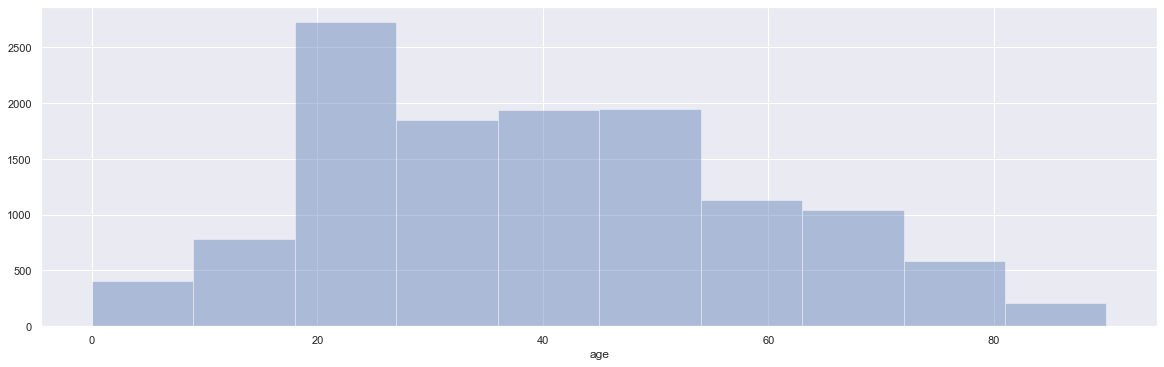

In [552]:
# age 比ストグラム
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.distplot(df['age'], kde=False, rug=False, bins=10)

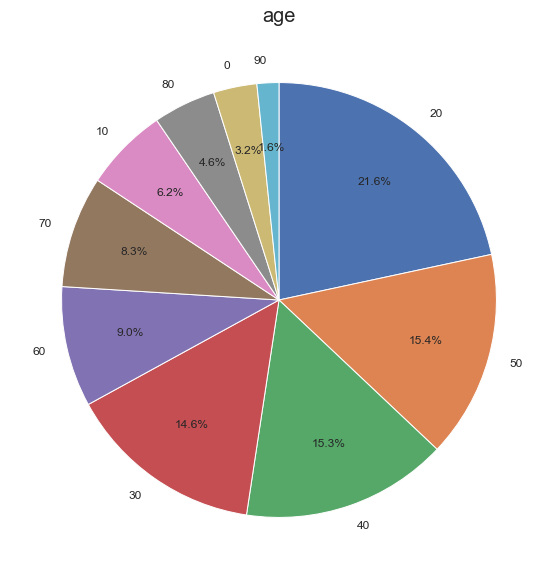

In [553]:
# age 円グラフ
label = list(df["age"].value_counts().index)

plt.figure(figsize=(10,10))
plt.pie(df['age'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'})
plt.title('age', fontsize=20)
plt.show()

#### 20~50代が多く，次いで60，70代

## 2.2.症状（Status）

In [554]:
# 全体のステータス分布({'退院':"0", '死亡':"5", 'その他':"999", '中等症':"3", '軽症':"2", '無症状':"1", '調査中':"999", '重症':"4"}
df['status'].value_counts(normalize=True)

discharge    0.785312
mild         0.170275
nothing      0.021413
dead         0.012372
moderate     0.008486
severe       0.002141
Name: status, dtype: float64

#### 全体の死亡率（５）は１％であることが分かる

In [555]:
# 年齢別死亡率
df[df['status'] == 'dead'].groupby('age').size()/df.groupby('age').size()

age
0          NaN
10         NaN
20         NaN
30         NaN
40    0.000517
50    0.001029
60    0.010619
70    0.038241
80    0.112628
90    0.170732
dtype: float64

#### 30代以下の死亡率は0％．また，80代から死亡率が上がっていることが分かる

In [556]:
# df.status.replace({'退院':"0", '死亡':"5", 'その他':"999", '中等症':"3", '軽症':"2", '無症状':"1", '調査中':"999", '重症':"4"}, inplace=True)

## 症状別の割合

In [557]:
df['status'].value_counts(normalize=True) 

discharge    0.785312
mild         0.170275
nothing      0.021413
dead         0.012372
moderate     0.008486
severe       0.002141
Name: status, dtype: float64

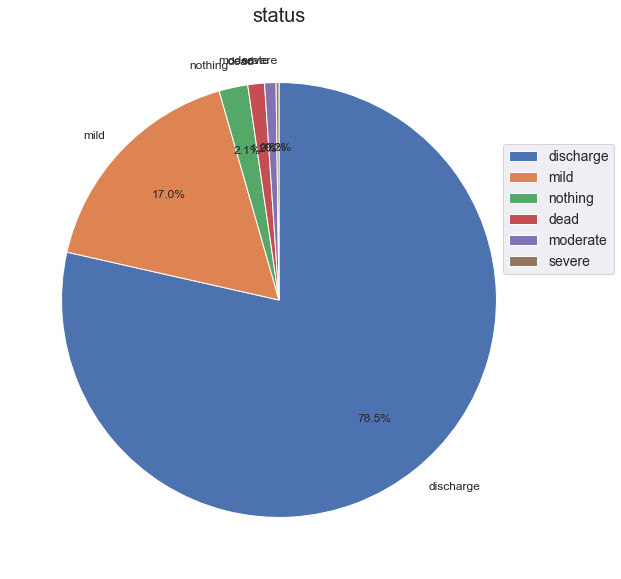

In [558]:
label = df['status'].value_counts().index 


plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 10
plt.pie(df.status.value_counts(),
        counterclock=False, startangle=90,
       labels=label,autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'})
plt.legend(label, fontsize=14,bbox_to_anchor=(0.9, 0.8)) # (7)凡例の表示
plt.title('status', fontsize=20)
plt.show()

### 退院（discharge）の割合が多いので退院を除外する

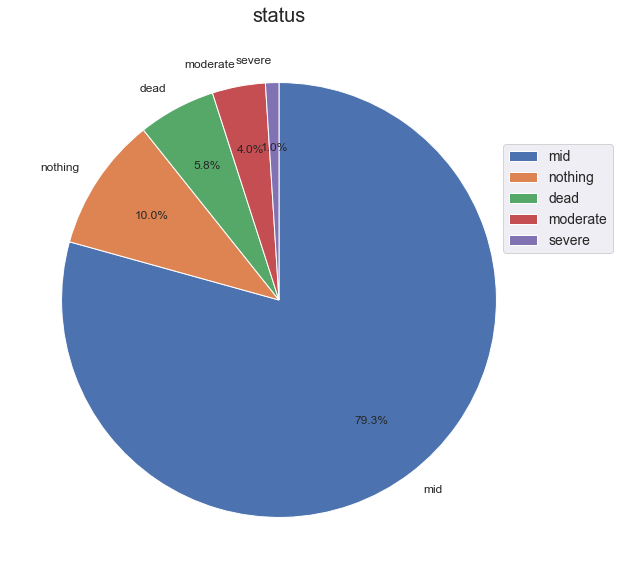

In [559]:
# 退院を除外したstatus
status_df = df[df['status'] != "discharge"]['status']

label = ['mid', 'nothing','dead','moderate','severe']

plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 10
plt.pie(status_df.value_counts(),
        counterclock=False, startangle=90,
       labels=label,autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'},)
plt.legend(label, fontsize=14,bbox_to_anchor=(0.9, 0.8)) # (7)凡例の表示
plt.title('status',fontsize=20)
plt.show()

### 全体の3/4が中等症（mid），次に多いのが無症状（notihng）

## 感染者数の推移

<AxesSubplot:xlabel='datetime', ylabel='Count'>

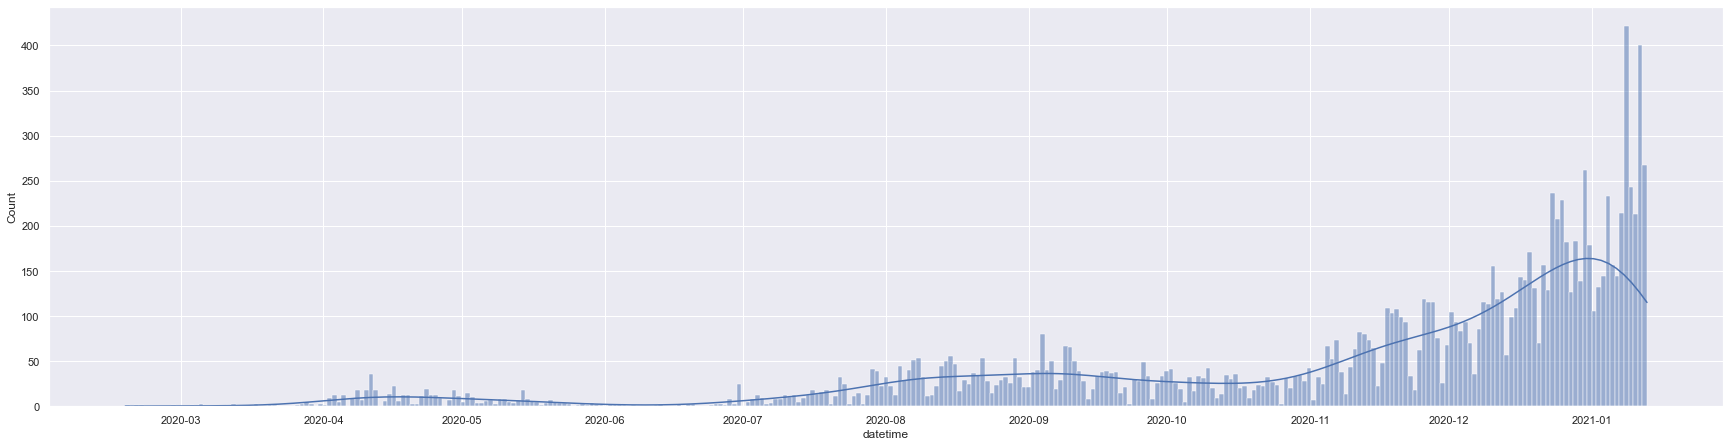

In [560]:
plt.figure(figsize=(30,25))
plt.subplot(3,1,1)
# sns.distplot(df['age'], kde=False, rug=False, bins=10)
bins_max=df["datetime"].max()-df["datetime"].min()
bins_max=bins_max.days+1
sns.histplot(df["datetime"],bins=bins_max, kde=True)

### 感染者数推移（11/01~1/13）

<AxesSubplot:xlabel='datetime', ylabel='Count'>

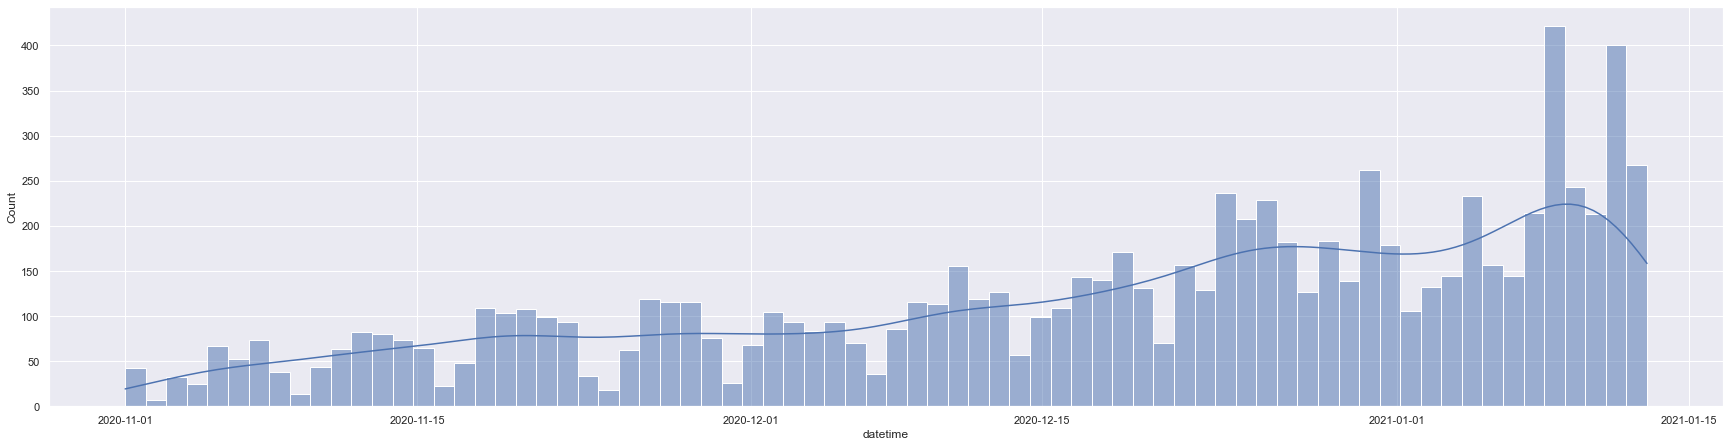

In [561]:
df_2011to2101 = df[df["date"] >= "20201101"]

plt.figure(figsize=(30,25))
plt.subplot(3,1,1)
# sns.distplot(df['age'], kde=False, rug=False, bins=10)
bins_max=df_2011to2101["datetime"].max()-df_2011to2101["datetime"].min()
bins_max=bins_max.days+1
sns.histplot(df_2011to2101["datetime"],bins=bins_max, kde=True)

### 死亡率の推移

In [562]:
df2 = df.set_index('datetime')
df2.flg_dead.value_counts()

0    12453
1      156
Name: flg_dead, dtype: int64

In [563]:
# df.groupby(df.datetime.week).agg(['idxmax', 'max'])
df_week = df2.resample('W').mean()
# df.reset_index()
df_week = pd.concat([df_week,df2.resample('W').size()],axis=1)
df_week.columns=['age','status','flg_discharge','flg_dea','number_of_cases']
df_week = df_week.reset_index()
df_week['date'] = df_week['datetime'].dt.strftime('%Y%m%d')

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [565]:
df_week = df_week.reset_index()
df_week['date'] = df_week['datetime'].dt.strftime('%Y-%m-%d')

In [566]:
df_week.head(10)

,datetime,age,flg_discharge,flg_dead,0,date
0,2020-02-23,50.000000,1.000000,0.000000,3,2020-02-23
1,2020-03-01,50.000000,1.000000,0.000000,1,2020-03-01
2,2020-03-08,50.000000,1.000000,0.000000,3,2020-03-08
3,2020-03-15,56.666667,1.000000,0.000000,3,2020-03-15
4,2020-03-22,66.000000,0.800000,0.200000,5,2020-03-22
5,2020-03-29,47.500000,1.000000,0.000000,12,2020-03-29
6,2020-04-05,40.487805,0.975610,0.024390,41,2020-04-05
7,2020-04-12,48.962264,0.896226,0.103774,106,2020-04-12
8,2020-04-19,48.133333,0.946667,0.053333,75,2020-04-19
9,2020-04-26,52.285714,0.914286,0.085714,70,2020-04-26


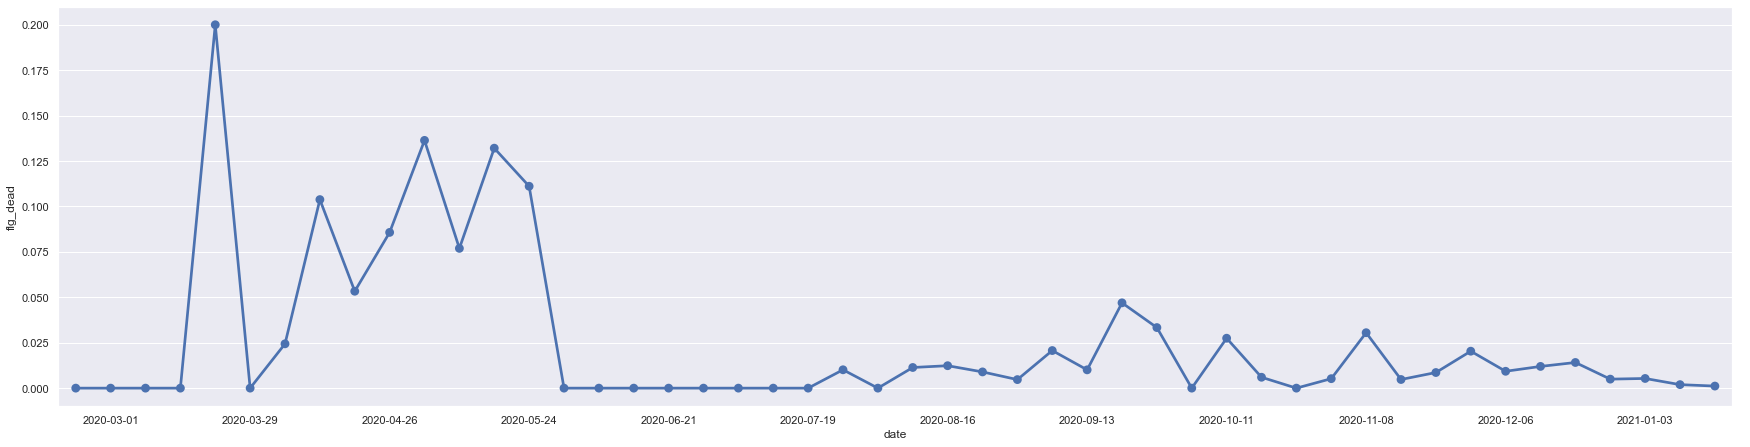

In [567]:
plt.figure(figsize=(30,25))
plt.subplot(3,1,1)
# ax2 = ax1.twinx()
ax = sns.pointplot(x='date', y='flg_dead', data=df_week)
# ax2 = sns.pointplot(x='date', y='size', data=df_week)
# ax.set(xlabel='Year', ylabel='Amount')
# ax.set(ylim=(0, 3000))
# sns.distplot(df['age'], kde=False, rug=False, bins=10)
# bins_max=df["datetime"].max()-df["datetime"].min()
# bins_max=bins_max.days+1
# sns.pointplot(df_week['size'])
# ax.set_xticks([20200301])
# plt.xticks([20201201],["A"])
# sns.pointplot(x='datetime', y='masize', data=df_week)
# plt.xticks.set_visible(False)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%4!=1:
        xticks[i].set_visible(False)
# plt.show()
# sns.pointplot(df_week['size'])
# sns.lineplot(x='datetime', y='size', data=df_week)
# sns.histplot(df["datetime"],bins=bins_max, kde=True)

plt.show()

#### 感染者数は増加しているが，死亡率に大きな変化なし

## 2.3年齢別症状

In [606]:
df_2101 = df[df["date"] >= "20210101"]
df_status_by_age = pd.crosstab(df_2101['status'], df_2101['age'], normalize=True)
a =df_status_by_age.iloc[4].sort_values(ascending=False)
# plt.figure(figsize=(30,25))
# plt.subplot(3,1,1)
# sns.distplot(df['age'], kde=False, rug=False, bins=10)
# bins_max=df_2011to2101["datetime"].max()-df_2011to2101["datetime"].min()
# bins_max=bins_max.days+1
# sns.histplot(df_2011to2101["datetime"],bins=bins_max, kde=True)
# sns.displot(df_)
a.reset_index()
# sns.barplot(a,x=a.index,y=)
a

age
20    0.011201
50    0.011201
0     0.010501
40    0.010151
30    0.008750
60    0.006650
80    0.006650
10    0.006300
70    0.004900
90    0.001750
Name: nothing, dtype: float64

In [613]:
a = a.reset_index()

In [624]:
a['age'] = a['age'].astype(str)

<AxesSubplot:xlabel='age', ylabel='nothing'>

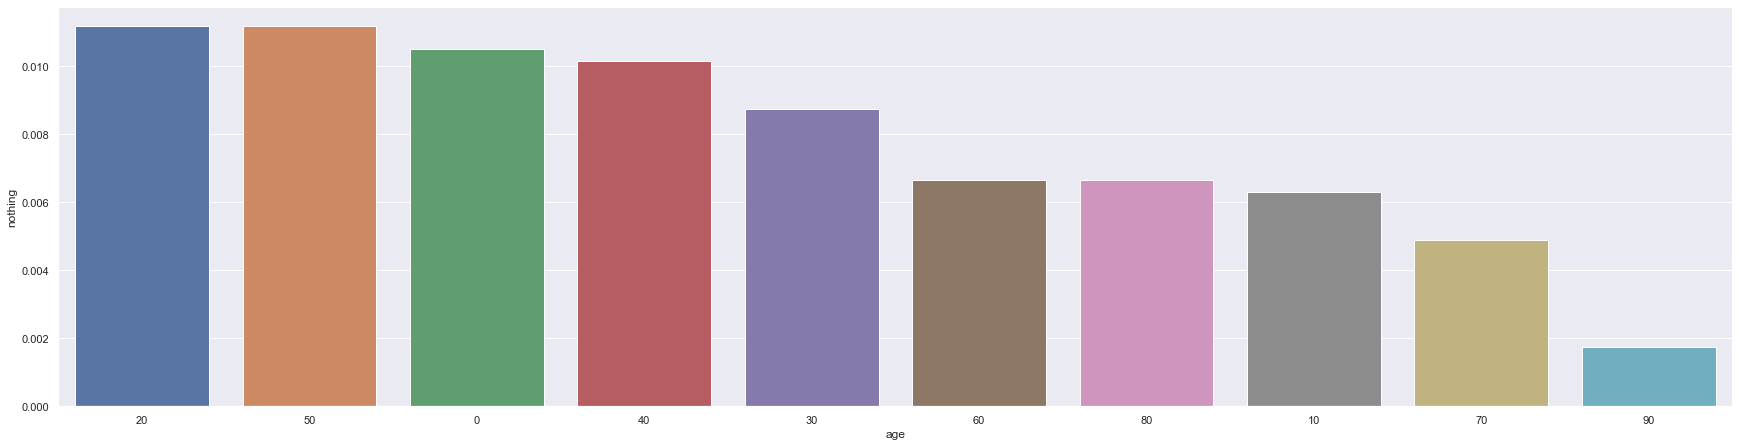

In [625]:
plt.figure(figsize=(30,25))
plt.subplot(3,1,1)
sns.barplot(data=a,x='age',y='nothing')

In [587]:
df.age.sort_values().unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

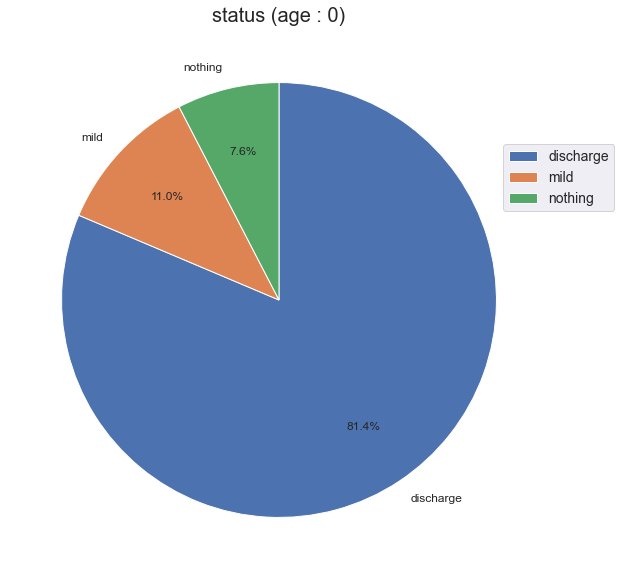

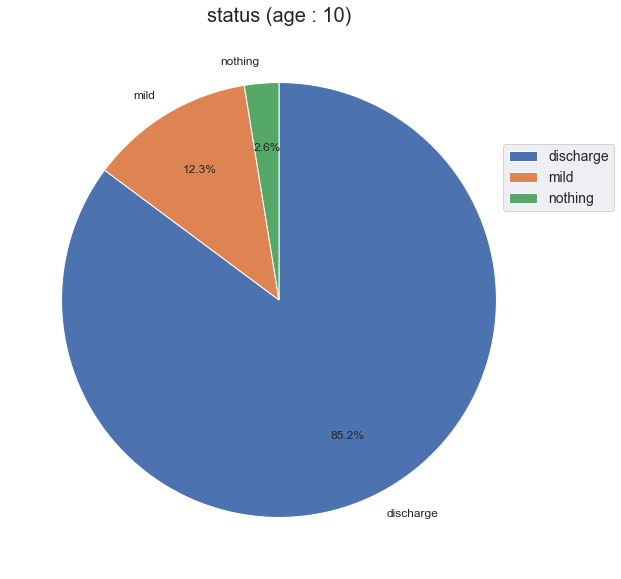

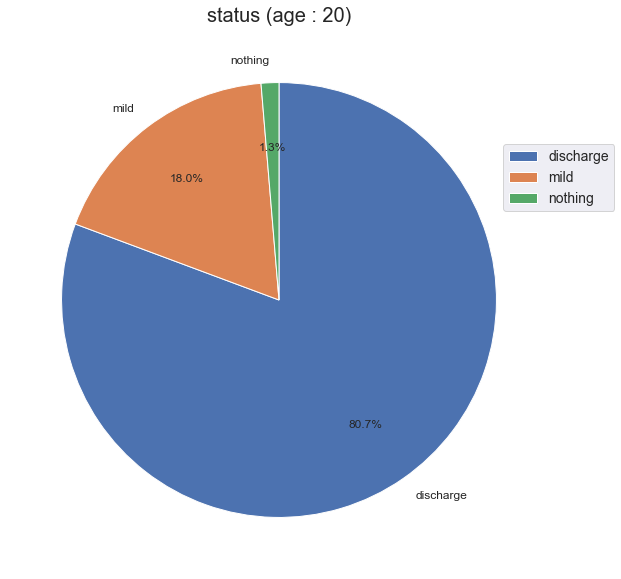

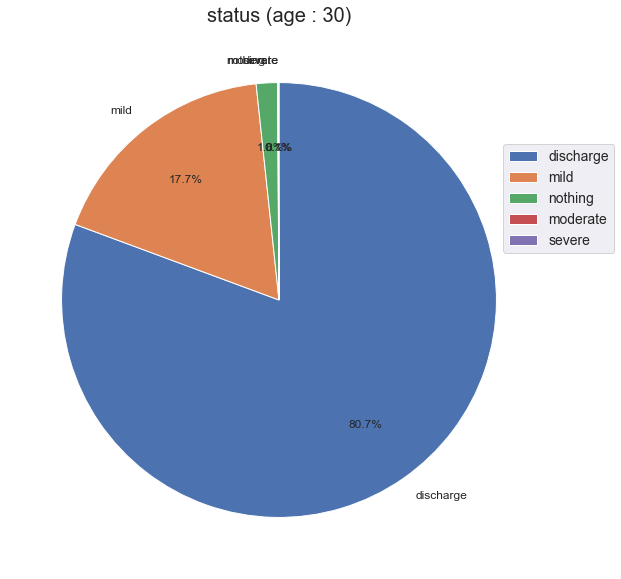

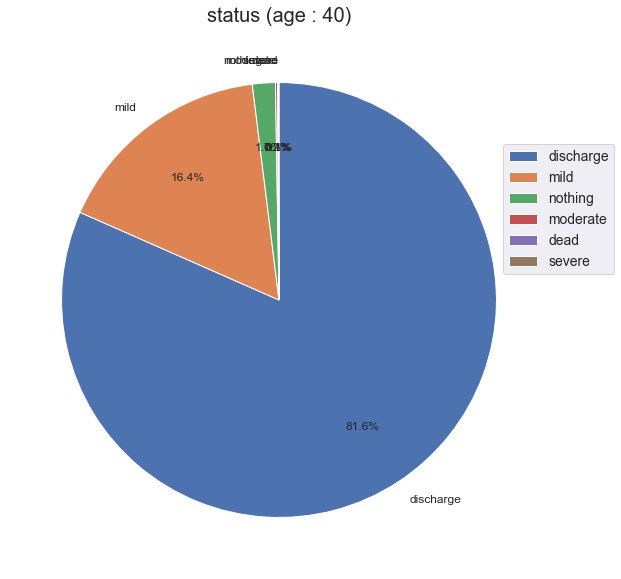

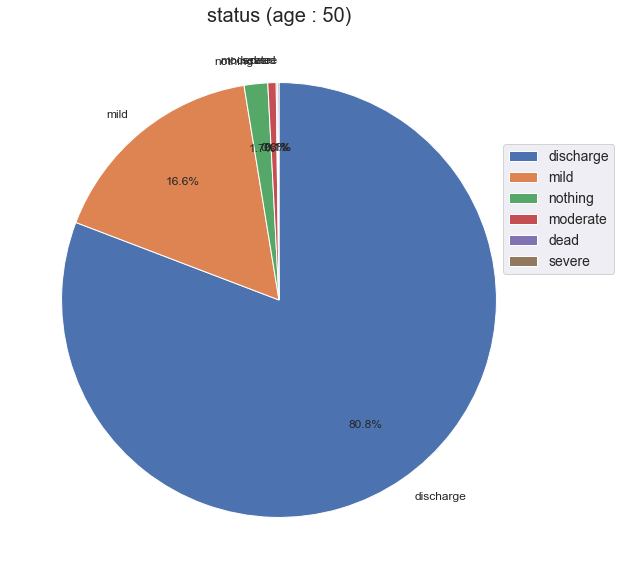

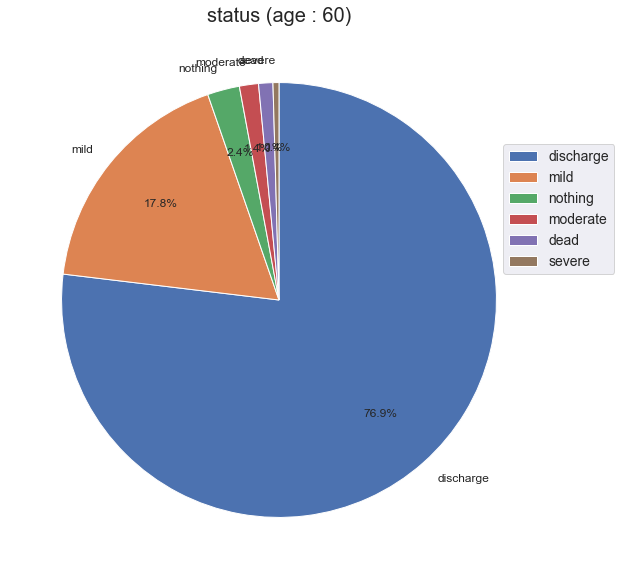

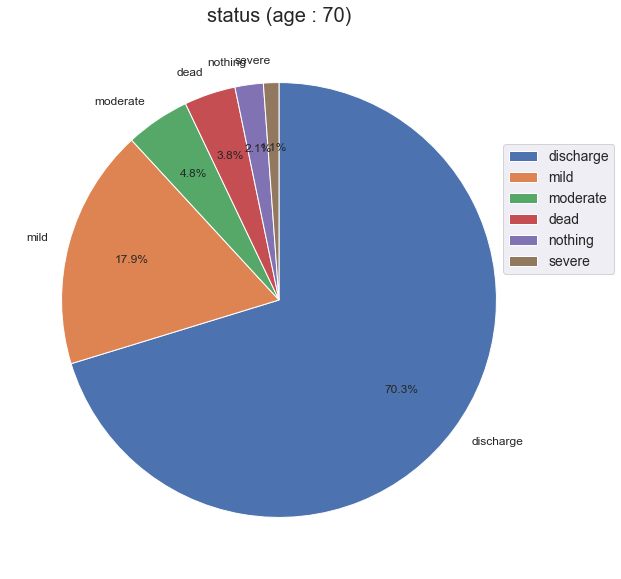

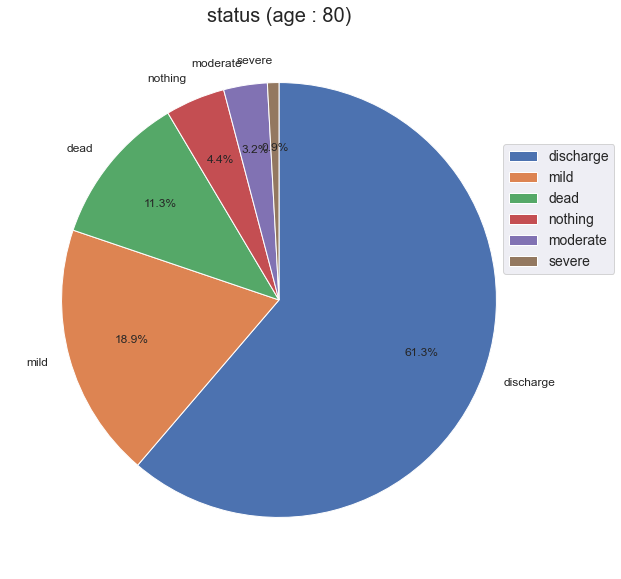

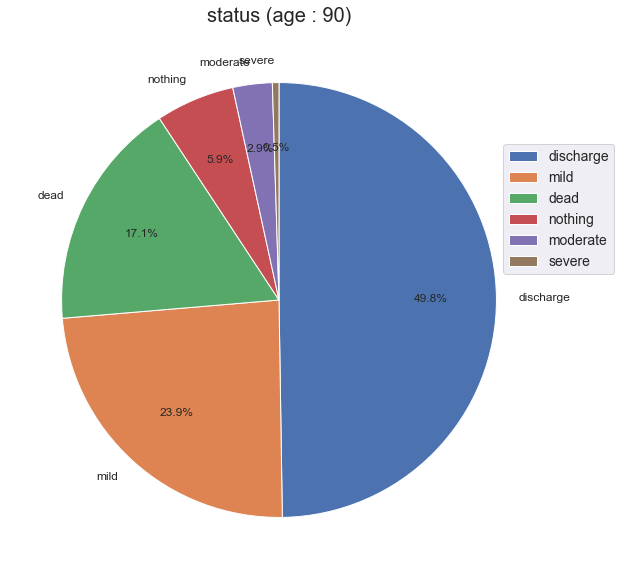

In [593]:
for i in df.age.sort_values().unique():
    df_by_age = df[df["age"] == i]

    label = list(df_by_age.status.value_counts().index)
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = 10
    plt.pie(df_by_age.status.value_counts(),
            counterclock=False, startangle=90,
        labels=label,autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'})
    plt.legend(label, fontsize=14,bbox_to_anchor=(0.9, 0.8)) # (7)凡例の表示
    plt.title('status (age : '+ str(i)+')', fontsize=20)
    plt.show()

In [454]:
df_status_by_age.columns[0]

0

In [455]:
df_status_by_age = pd.crosstab(df_2101['status'], df_2101['age'])
df_status_by_age[df_status_by_age.columns[0]].value_counts()

0     3
25    1
43    1
30    1
Name: 0, dtype: int64

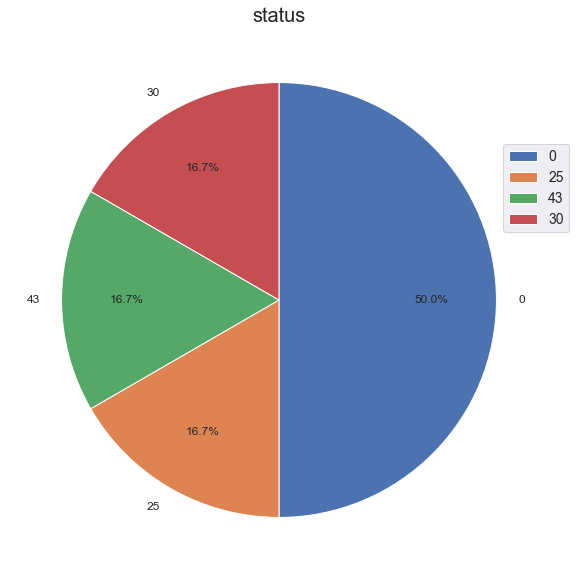

In [449]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 10
label = df_status_by_age[0].value_counts().index
plt.pie(df_status_by_age[0].value_counts(),
        counterclock=False, startangle=90,
    labels=label,autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'})
plt.legend(label, fontsize=14,bbox_to_anchor=(0.9, 0.8)) # (7)凡例の表示
plt.title('status', fontsize=20)
plt.show()

In [443]:
# label = ['discharge', 'mild', 'nothing','dead','moderate','severe']

for i in range(len(df_status_by_age.index)):
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = 10
    label = df_2101[i].sort_values().index
    plt.pie(df_2101[i].sort_values(),
            counterclock=False, startangle=90,
        labels=label,autopct='%1.1f%%', pctdistance=0.7,textprops={'size': 'large'})
    plt.legend(label, fontsize=14,bbox_to_anchor=(0.9, 0.8)) # (7)凡例の表示
    plt.title('status', fontsize=20)
    plt.show()

KeyError: 0

<Figure size 2160x1800 with 0 Axes>

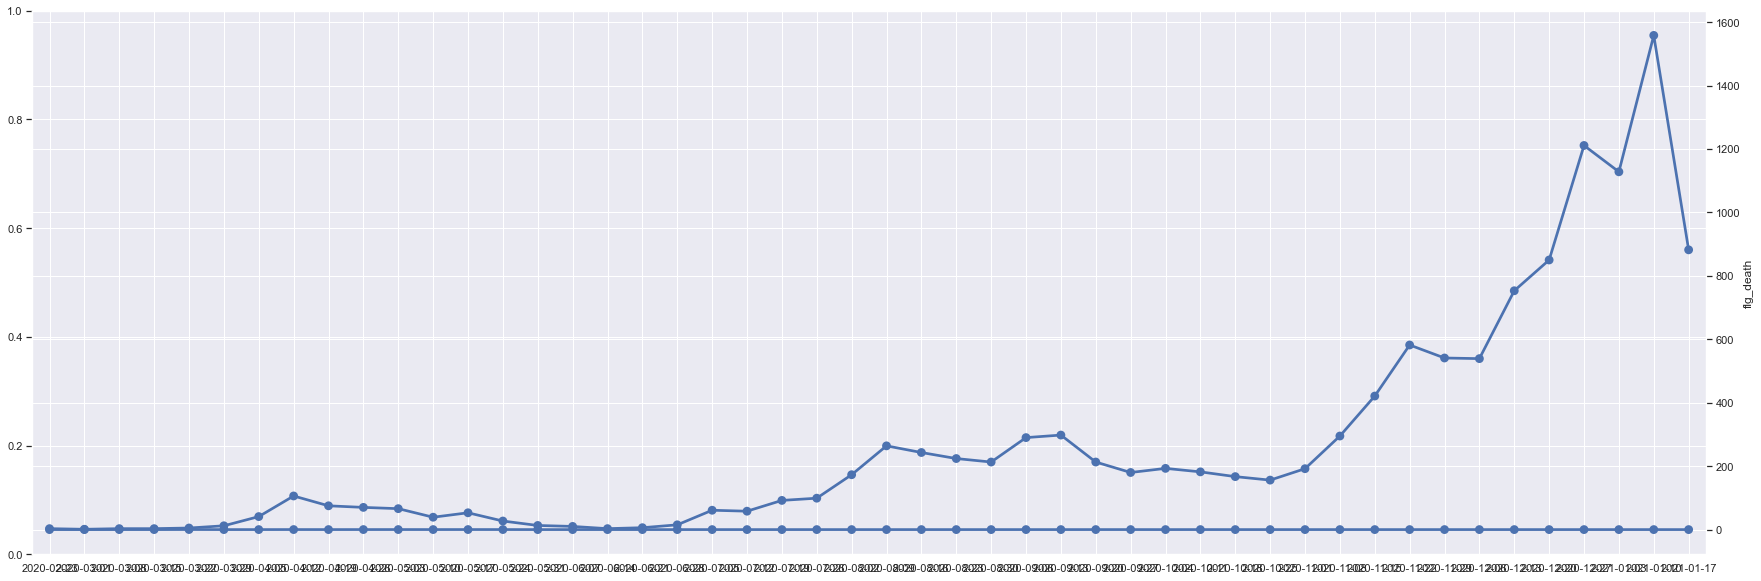

In [405]:
plt.figure(figsize=(30,25))
fig, ax1 = plt.subplots(figsize=(30,10))
ax2 = ax1.twinx()
ax1 = sns.pointplot(x='date', y='size', data=df_week)
ax2 = sns.pointplot(x='date', y='flg_dead', data=df_week)
# ax.set(xlabel='Year', ylabel='Amount')
# ax.set(ylim=(0, 3000))
# sns.distplot(df['age'], kde=False, rug=False, bins=10)
# bins_max=df["datetime"].max()-df["datetime"].min()
# bins_max=bins_max.days+1
# sns.pointplot(df_week['size'])
# ax.set_xticks([20200301])
# plt.xticks([20201201],["A"])
# sns.pointplot(x='datetime', y='masize', data=df_week)
# plt.xticks.set_visible(False)
# ax1.set_ylim([0, 2.0])
# ax1.set_ylim([0, 1600])
# ax2.set_ylim([0, 0.2])
xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%4!=1:
        xticks[i].set_visible(False)
# plt.show()
# sns.pointplot(df_week['size'])
# sns.lineplot(x='datetime', y='size', data=df_week)
# sns.histplot(df["datetime"],bins=bins_max, kde=True)

plt.show()

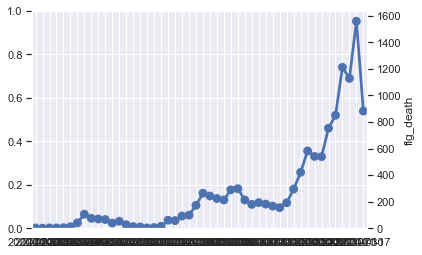

In [411]:
#第一軸(ax1)と第二軸(ax2)を作ってax1 が左側の第一軸に、ax2 が右側で第二軸になります
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#y1, y2軸それぞれの範囲を設定する
# ax1.set_ylim([0, 250])
# ax2.set_ylim([0, 1.1])

#グリッドは第一軸のみとする
ax1.grid(True)
ax2.grid(False)

#第一軸が棒グラフ、第二軸が折れ線グラフで描画する
# ax1.bar(x, y1, label='# of Cases', color="lightblue" )
# ax2.plot(x, y2, linewidth=2, color='orange', linestyle='solid', marker='o', markersize=8, label='Success Rate')
ax1 = sns.pointplot(x='date', y='size', data=df_week)
ax2 = sns.barplot(x='date', y='flg_dea', data=df_week)

plt.show()

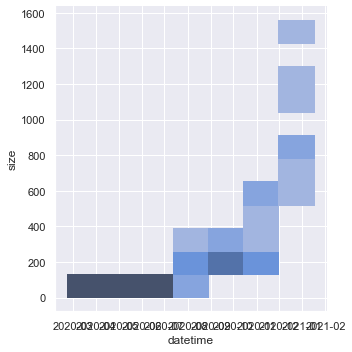

In [296]:
sns.displot(x='datetime',y='size',data=df_week)

In [166]:
df_2011to2101["size"].max()

422

In [127]:
 df_2011to2101=df.groupby('date').size().reset_index()
 df_2011to2101.rename(columns={"0","size"})

In [128]:
df_2011to2101 = pd.DataFrame(df.groupby('datetime').size().reset_index())
df_2011to2101.columns=['datetime','size']
df_2011to2101

,date,size
0,2020-02-18,1
1,2020-02-20,1
2,2020-02-21,1
3,2020-02-28,1
4,2020-03-03,1
...,...,...
281,2021-01-09,422
282,2021-01-10,243
283,2021-01-11,213
284,2021-01-12,401


In [346]:
# 描画
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(30, 5))
ax.plot(df_2011to2101["date"], df_2011to2101["size"],width=1.0)
# ax.set_xlim([20200318 20210113])

# 軸目盛の設定
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=7, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
# plt.xlim=([20200318 20210113])

## 補助目盛りを使いたい場合や時刻まで表示したい場合は以下を調整して使用
# ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1), tz=None))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))

# 軸目盛ラベルの回転
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

ax.grid()

KeyError: 'size'

In [124]:
fig = plt.figure()
plt.hist(x="date",y="size", data=df_2011to2101)

TypeError: can only concatenate str (not "numpy.float64") to str

<AxesSubplot:xlabel='date', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

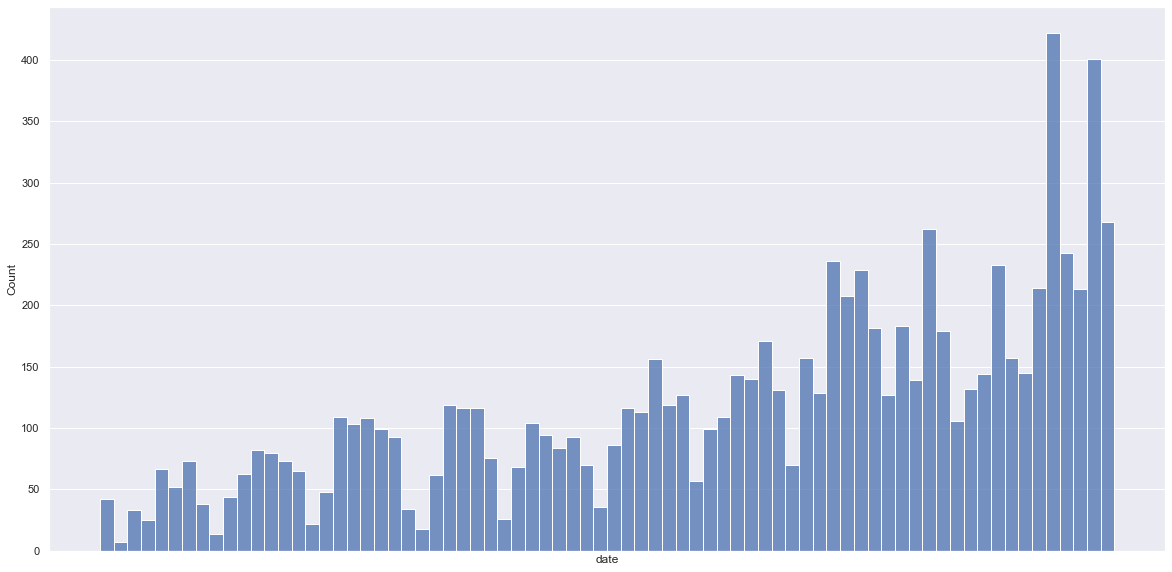

In [88]:
# Figureを設定
fig = plt.figure()

# Axesを追加
# ax = fig.add_subplot(3,1,1)

# # xのデータを作成
# x = np.arange(-4, 4, 0.1)

# # y = exp(x)
# y = np.exp(x)

# Axesのタイトルの設定
ax.set_title("y = exp(x)", fontsize = 16)

# 軸ラベルの設定
ax.set_xlabel("x", size = 14, weight = "light")
ax.set_ylabel("y", size = 14, weight = "light")

# x軸の目盛設定
ax.set_xticks([-4, -2, 0, 2, 4])

# y軸の目盛設定
ax.set_yticks([0, 20, 40])

# 目盛方向を両側に設定
# 目盛の長さを5ポイントに設定
# 目盛と目盛ラベルの色をblueに設定
ax.tick_params(direction = "inout", length = 5, colors = "blue")

# データをプロット
# ax.plot(x, y, color = "red")
plt.figure(figsize=(20,10))
# plt.subplot(3,1,1)
ax.set_xticks([20201101])
plt.xticks([20201201],["A"])
sns.histplot(df_2011to2101["date"],bins=100)
# plt.show()

In [53]:
df_count = df.groupby('date').size()
sns.lineplot(x=df_count.index, y="value", data=df_count)

ValueError: Could not interpret value `value` for parameter `y`

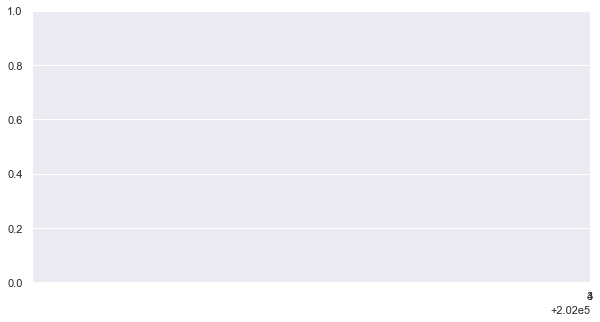

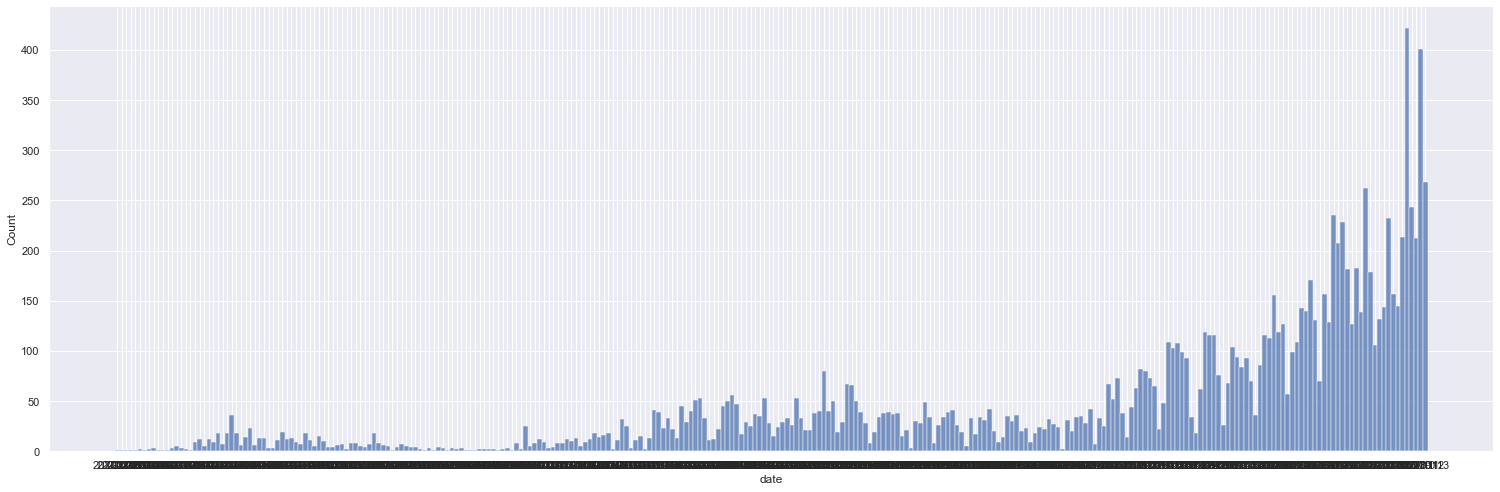

In [55]:
# dateの分布
sns.set() 
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xticks([202003,202004]) 
sns.displot(df["date"],height=7,aspect=3,bins=100)
plt.show()

## 11月以降

In [35]:
df_2011to2101 = df[df["date"] >= "20201101"]
df_2011to2101 

,datetime,date,age,status,flg_discharge,flg_death
3934,2020-11-01,20201101,50,0,1,0
3935,2020-11-01,20201101,20,0,1,0
3936,2020-11-01,20201101,50,0,1,0
3937,2020-11-01,20201101,20,0,1,0
3938,2020-11-01,20201101,80,0,1,0
...,...,...,...,...,...,...
13319,2021-01-13,20210113,70,2,0,0
13320,2021-01-13,20210113,20,2,0,0
13321,2021-01-13,20210113,40,0,1,0
13323,2021-01-13,20210113,20,2,0,0


In [25]:
sns.displot(df_2011to2101["date"],height=7,aspect=3,bins=100,space=0.8)

AttributeError: 'Rectangle' object has no property 'space'

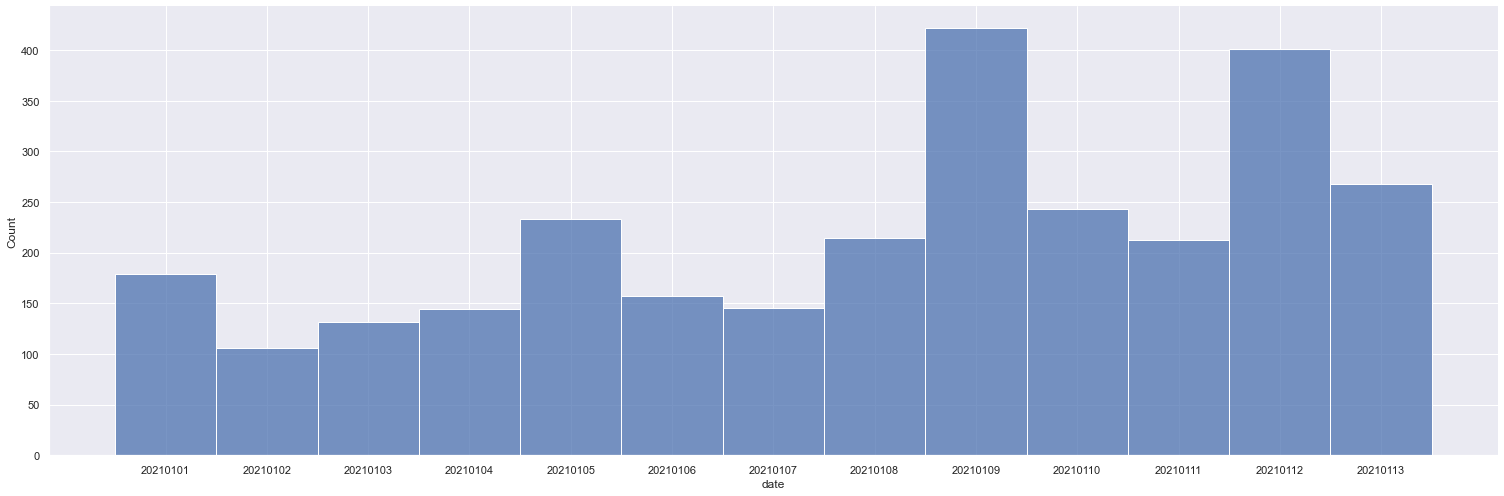

In [159]:
df_2012to2101 = df[df["date"] >= "20210101"]
sns.displot(df_2012to2101["date"],height=7,aspect=3)

In [ ]:
# 年齢別のstatus，無症状者の割合
# 時系列の感染者数
# 時系列の志望者数

<AxesSubplot:xlabel='age'>

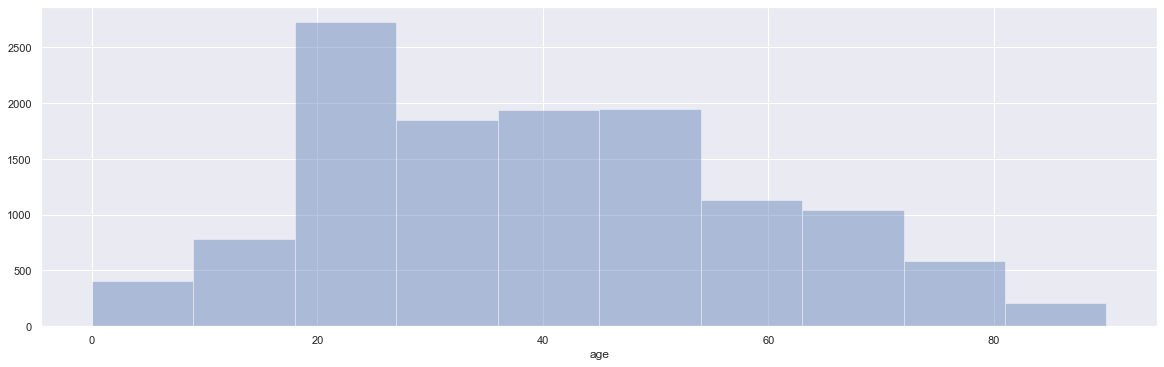

In [260]:
# age
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.distplot(df['age'], kde=False, rug=False, bins=10)

<AxesSubplot:xlabel='status'>

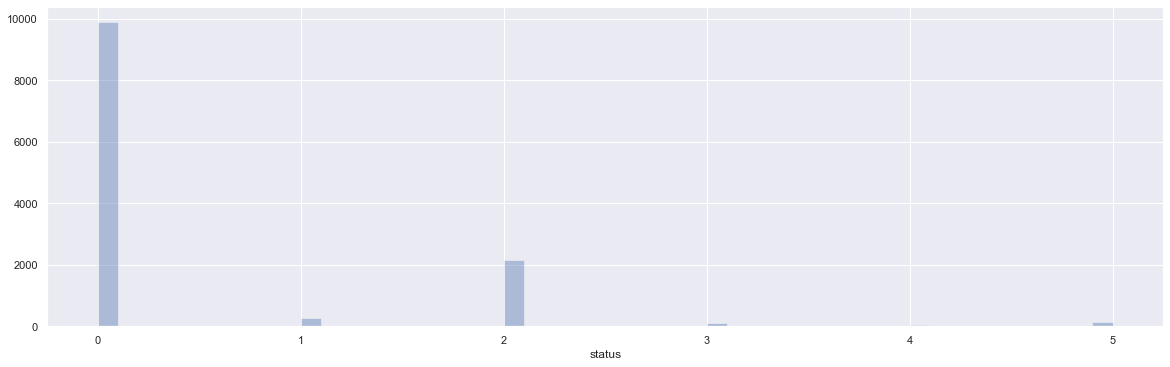

In [262]:
# status
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.distplot(df['status'], kde=False, rug=False)

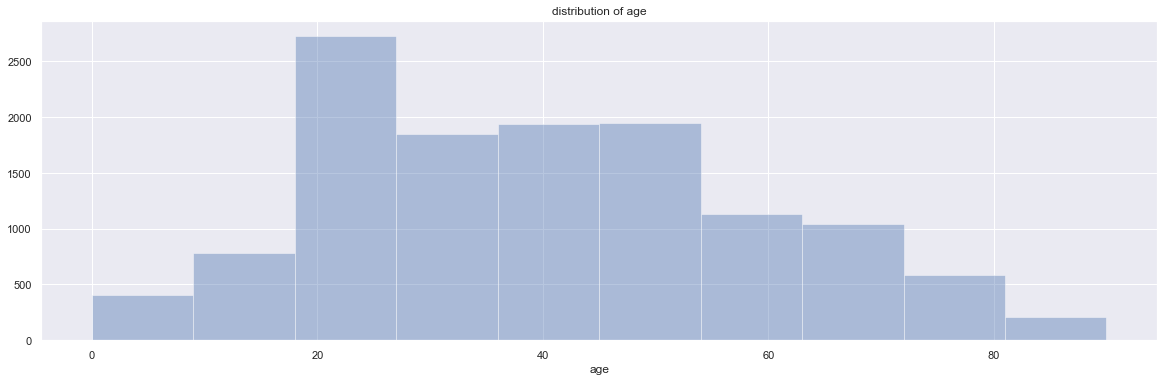

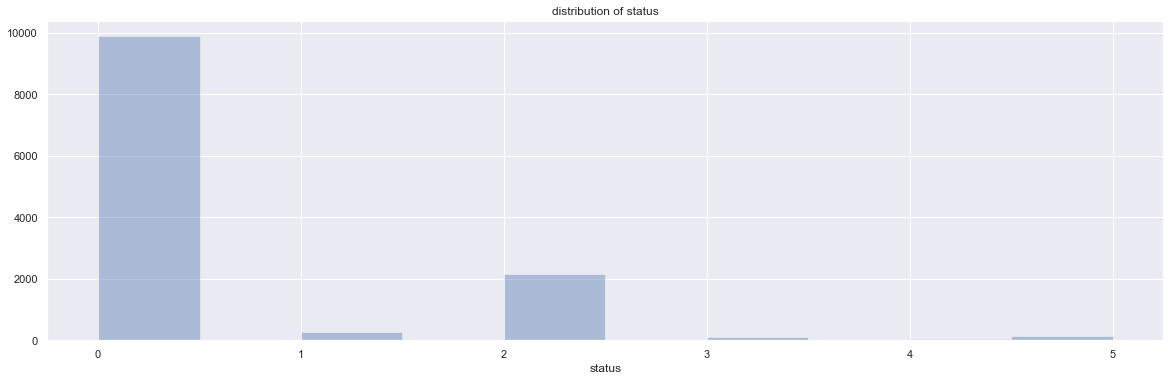

In [246]:
# age,statusの分布
int_col = [
    'age'
    ,'status'
]
cnt = 0
for col in int_col: 
    plt.figure(figsize=(20,20))
    plt.subplot(3,1,cnt+1)
    sns.distplot(df[col], kde=False, rug=False, bins=10)
    plt.title('distribution of {}'.format(col))
    cnt = cnt + 1

<AxesSubplot:xlabel='status', ylabel='Density'>

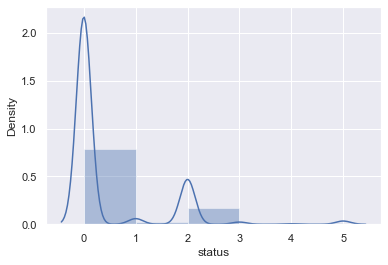

In [254]:
sns.distplot(df['status'], bins=5)

<AxesSubplot:xlabel='age'>

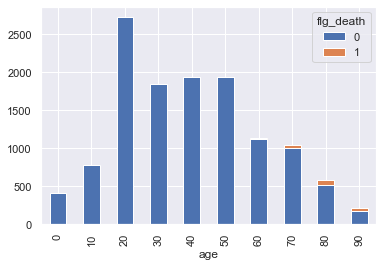

In [147]:
age_death = pd.crosstab(df["age"],df["flg_death"])
# fig = plt.figure(figsize={10,10})
age_death.plot.bar(stacked=True)

In [212]:
df["age"].value_counts()

20    2728
50    1943
40    1935
30    1845
60    1130
70    1046
10     783
80     586
0      408
90     205
Name: age, dtype: int64

,datetime,age,status,flg_discharge,flg_death
date,,,,,
20200218,1,1,1,1,1
20200220,1,1,1,1,1
20200221,1,1,1,1,1
20200228,1,1,1,1,1
20200303,1,1,1,1,1
...,...,...,...,...,...
20210109,422,422,422,422,422
20210110,243,243,243,243,243
20210111,213,213,213,213,213


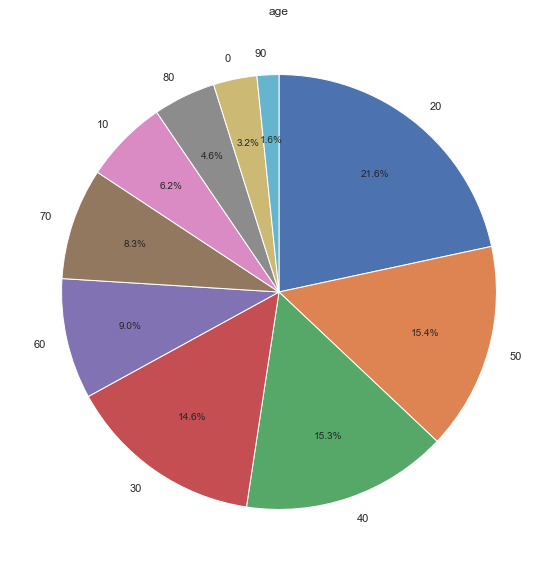

In [222]:
label = ['20', '50', '40','30','60','70','10','80','0','90']

plt.figure(figsize=(10,10))
plt.pie(df['age'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
plt.title('age')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Density'>

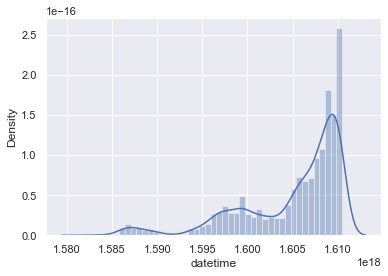

In [145]:
sns.distplot(df["datetime"])

In [86]:
pd.pivot_table(df,index="age", columns="status",aggfunc="sum")

flg_discharge                              
status           0    1    2    3    4    5    999
age                                               
0              332.0  0.0  0.0  NaN  NaN  NaN  0.0
10             667.0  0.0  0.0  NaN  NaN  NaN  0.0
20            2201.0  0.0  0.0  NaN  NaN  NaN  0.0
30            1488.0  0.0  0.0  0.0  0.0  NaN  0.0
40            1579.0  0.0  0.0  0.0  0.0  0.0  0.0
50            1570.0  0.0  0.0  0.0  0.0  0.0  0.0
60             869.0  0.0  0.0  0.0  0.0  0.0  0.0
70             735.0  0.0  0.0  0.0  0.0  0.0  0.0
80             359.0  0.0  0.0  0.0  0.0  0.0  0.0
90             102.0  0.0  0.0  0.0  0.0  0.0  0.0
999              6.0  NaN  NaN  NaN  NaN  0.0  0.0

In [121]:
df.flg_discharge.unique()

array([1, 0])

In [123]:
df.status.unique()

array([0, 1])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10058 entries, 0 to 13321
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           10058 non-null  object
 1   age            10058 non-null  int32 
 2   status         10058 non-null  int32 
 3   flg_discharge  10058 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 595.0+ KB


In [130]:
df.status.value_counts()

0    9902
1     156
Name: status, dtype: int64

In [153]:
df["date"].dt.strftime("%Y")

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
13319    2021
13320    2021
13321    2021
13323    2021
13324    2021
Name: date, Length: 12609, dtype: object